<a href="https://colab.research.google.com/github/newbieforgit/newbieforgit/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 최인접항만 고려


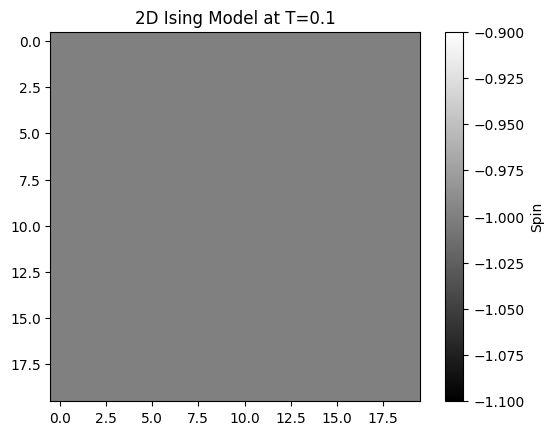

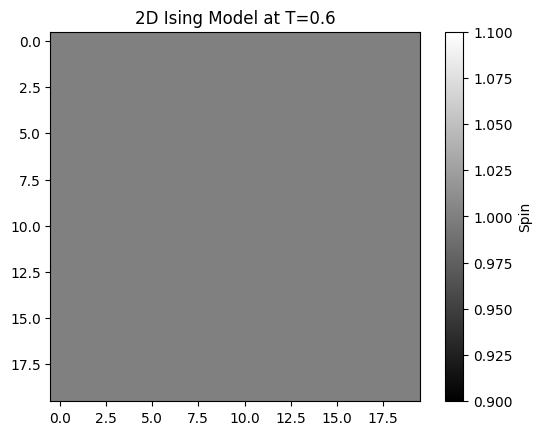

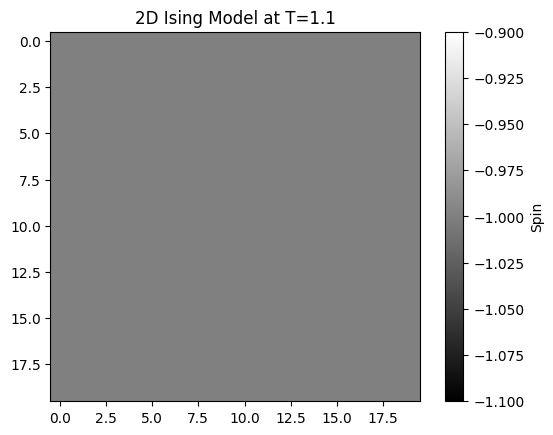

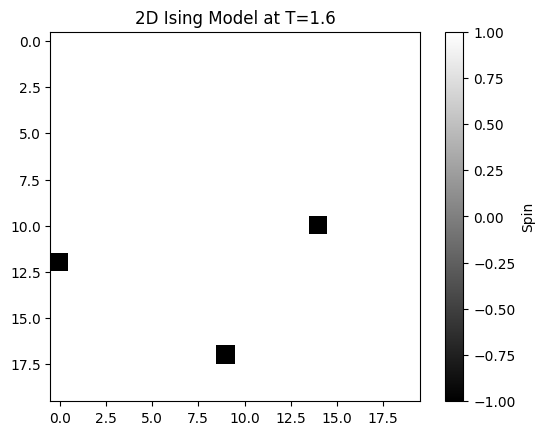

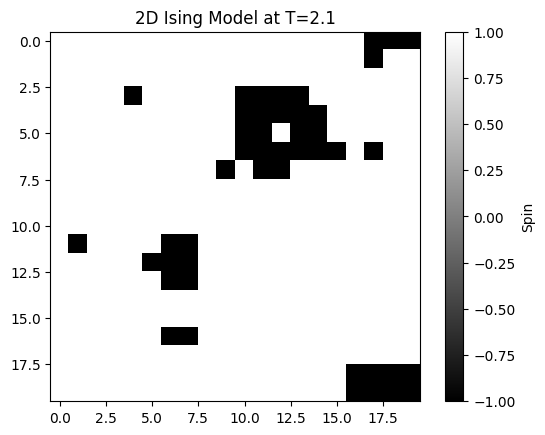

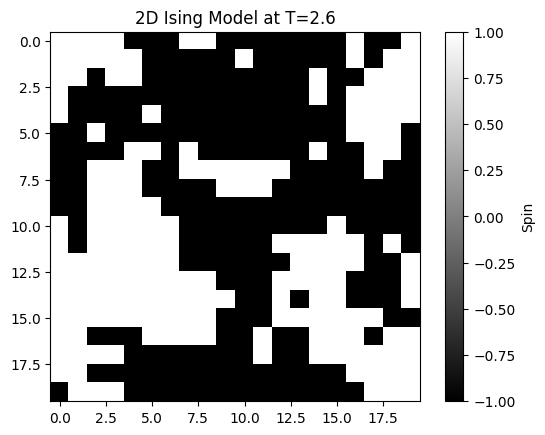

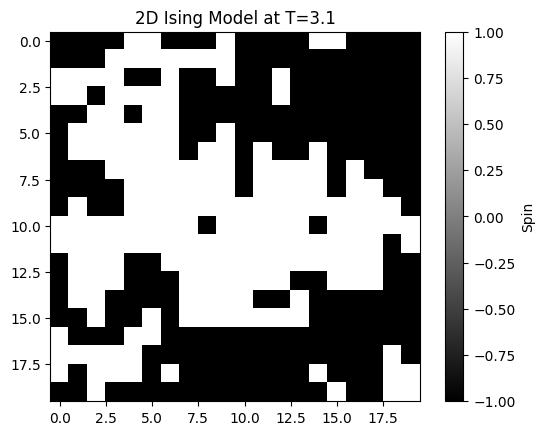

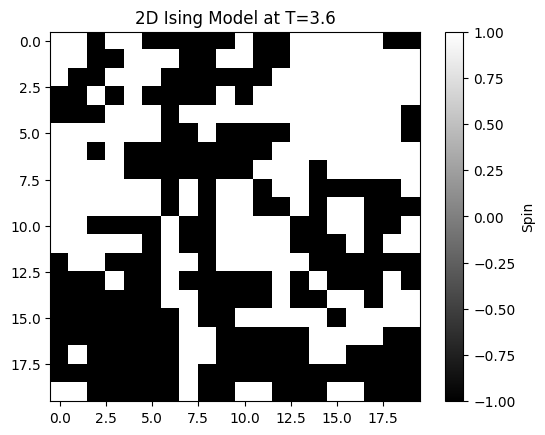

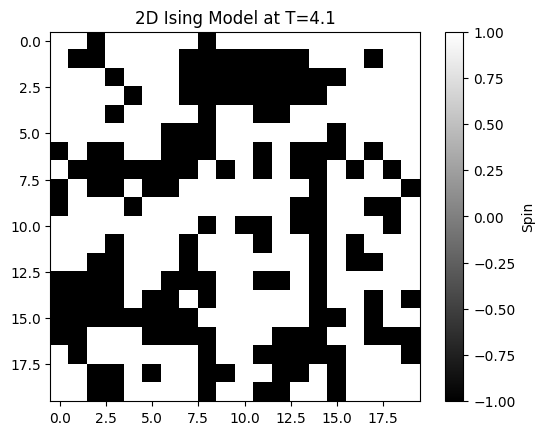

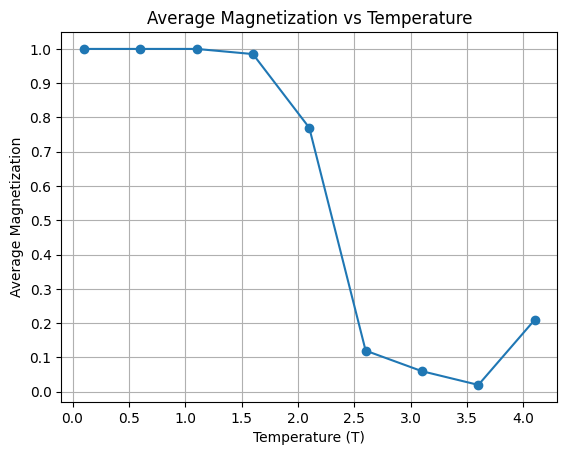

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L):
    lattice = np.random.choice([-1, 1], size=(L, L))
    return lattice

def metropolis_step(lattice, J, T):

    L = lattice.shape[0]

    for _ in range(L**2):
        # 랜덤한 격자점
        x = np.random.randint(L)
        y = np.random.randint(L)

        # 이웃한 격자들
        neighbors = lattice[(x+1)%L, y] + lattice[x, (y+1)%L] + lattice[(x-1)%L, y] + lattice[x, (y-1)%L]

        # 에너지 변화 계산
        delta_E = 2 * J * lattice[x, y] * neighbors

        #스핀을 뒤집을지 말지
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            lattice[x, y] *= -1

    return lattice

def simulate(L, J, T, steps):
    lattice = initialize_lattice(L)
    for step in range(steps):
        lattice = metropolis_step(lattice, J, T)
    return lattice

#평균 자화값 계산합니다.
def calculate_magnetization(lattice):
    return np.mean(lattice)


def plot_lattice(lattice, T):
    plt.imshow(lattice, cmap='gray', interpolation='nearest')
    plt.colorbar(label='Spin')
    plt.title(f'2D Ising Model at T={T}')
    plt.show()

# 시뮬레이션 설정
L = 20  # 격자 크기
J = 1.0
steps = 5000  # 시뮬레이션 스텝 수

# 시뮬레이션 실행
Ma_list = []
T_list = np.arange(0.1, 4.6, 0.5)

for T in T_list:
    final_lattice = simulate(L, J, T, steps)
    plot_lattice(final_lattice, T)
    magnetization = calculate_magnetization(final_lattice)
    Ma_list.append(abs(magnetization))

# 자화 평균값을 플로팅
plt.plot(T_list, Ma_list, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs Temperature')
yticks = np.arange(0, 1.1, 0.1)  # 0에서 1까지 0.1 간격으로 눈금 설정
plt.yticks(yticks)
plt.grid(True)
plt.show()

### 차인접항까지 고려 그러나 수학적 트릭을 사용해서 짝홀로 최인접 차인접 구분

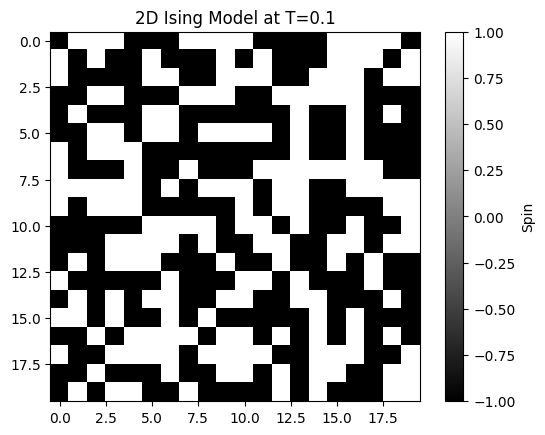

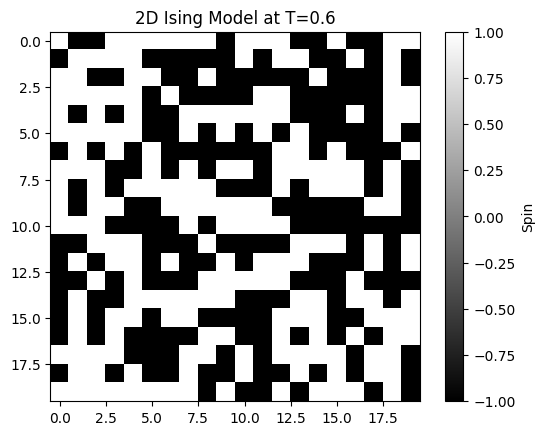

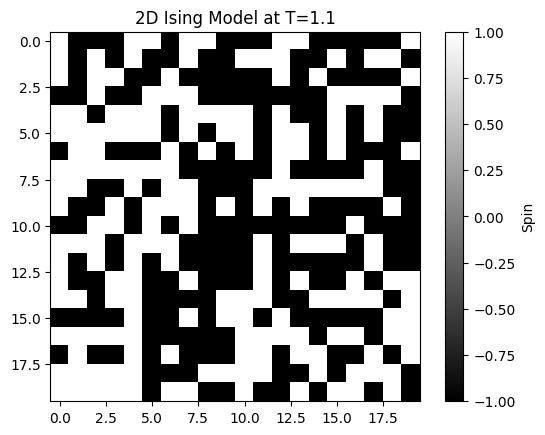

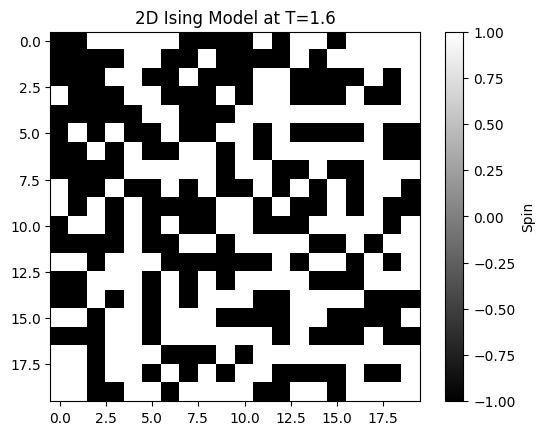

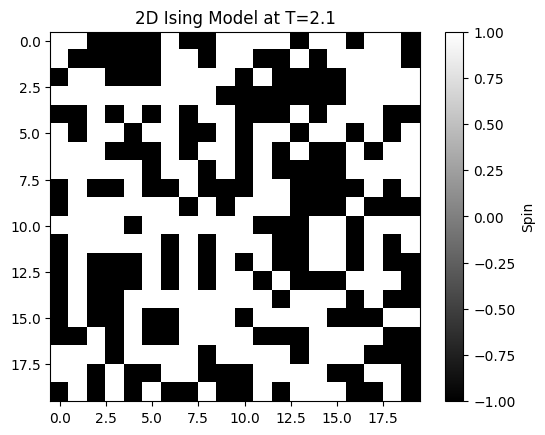

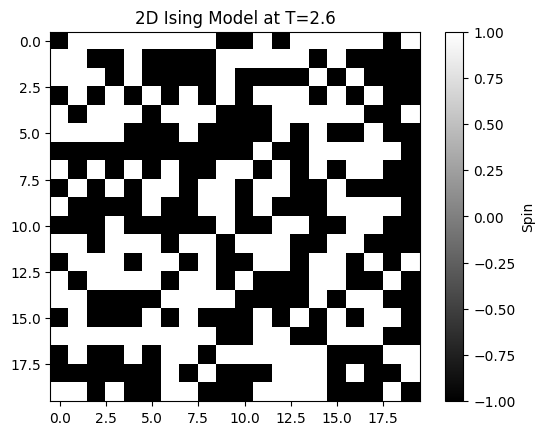

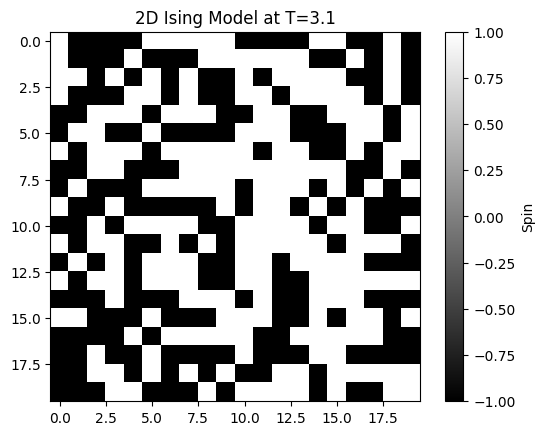

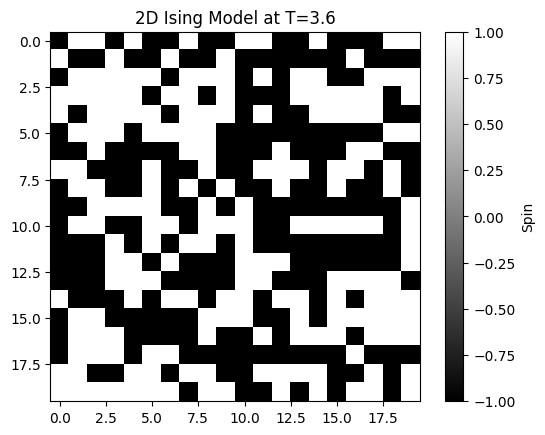

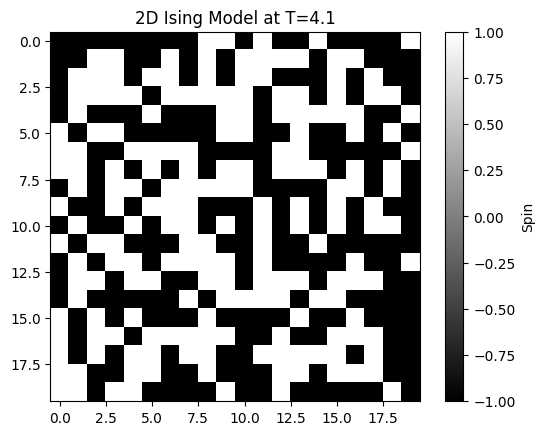

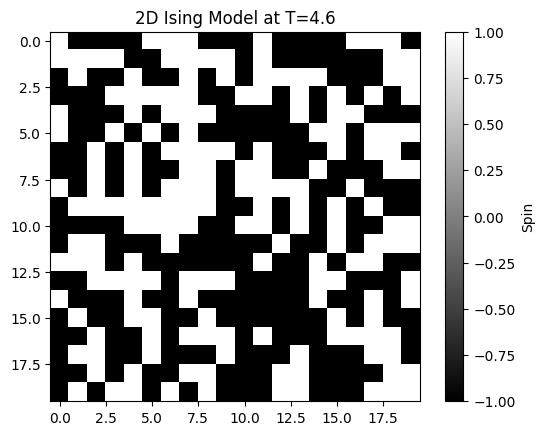

Total execution time: 268.25693941116333 seconds


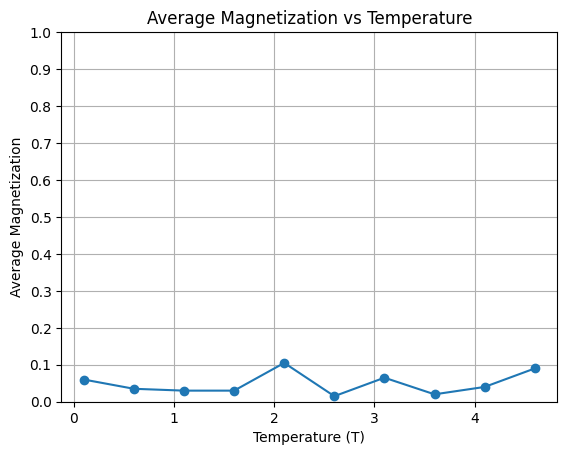

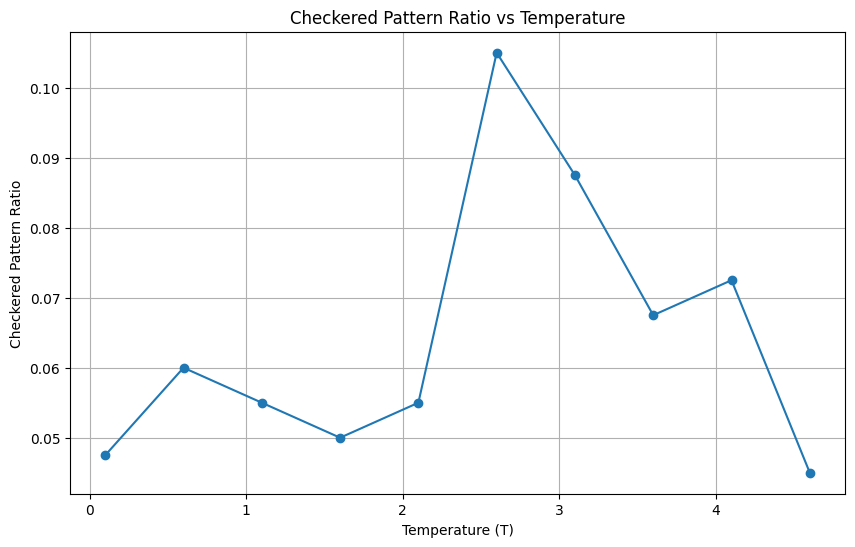

In [8]:

# J1 과 J2 로 모형 시뮬레이션 (자리의 짝홀에 따라)

import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L):
    lattice = np.random.choice([-1, 1], size=(L, L))
    return lattice

def metropolis_step(lattice, J1, J2, T):
    L = lattice.shape[0]
    for _ in range(L**2):
        x = np.random.randint(L)
        y = np.random.randint(L)

        neighbors = (lattice[(x+1)%L, y] + lattice[x, (y+1)%L] +
                     lattice[(x-1)%L, y] + lattice[x, (y-1)%L] )

        J = J1 if (x+y) % 2 == 0 else J2

        delta_E = 2 * J * lattice[x, y] * neighbors

        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            lattice[x, y] *= -1

    return lattice

def simulate(L, J1, J2, T, steps):
    lattice = initialize_lattice(L)
    for step in range(steps):
        lattice = metropolis_step(lattice, J1, J2, T)
    return lattice

def calculate_magnetization(lattice):
    return np.mean(lattice)

def plot_lattice(lattice, T):
    plt.imshow(lattice, cmap='gray', interpolation='nearest')
    plt.colorbar(label='Spin')
    plt.title(f'2D Ising Model at T={T}')
    plt.show()

def calculate_checkered_ratio(lattice):
    L = lattice.shape[0]
    checkered_count = 0

    for x in range(L):
        for y in range(L):
            # 인접 스핀들과 비교하여 체크무늬 패턴 감지
            if (lattice[x, y] != lattice[(x+1)%L, y] and
                lattice[x, y] != lattice[x, (y+1)%L] and
                lattice[x, y] != lattice[(x-1)%L, y] and
                lattice[x, y] != lattice[x, (y-1)%L]):
                checkered_count += 1

    total_sites = L * L
    checkered_ratio = checkered_count / total_sites
    return checkered_ratio

# 시뮬레이션 설정
L = 20  # 격자 크기
J1 = -1.0
J2 = 0.7  # 다른 성질의 상호작용을 위해 음수로 설정
steps = 5000  # 시뮬레이션 스텝 수

# 시뮬레이션 실행
Ma_list = []
T_list = np.arange(0.1, 4.7, 0.5)

import time
start_time = time.time()

checkered_ratios=[]

for T in T_list:
    final_lattice = simulate(L, J1 , J2, T, steps)
    plot_lattice(final_lattice, T)
    checkered_ratio = calculate_checkered_ratio(final_lattice) #체크
    checkered_ratios.append(checkered_ratio) #체크
    magnetization = calculate_magnetization(final_lattice)
    Ma_list.append(abs(magnetization))
end_time = time.time()
print(f"Total execution time: {end_time - start_time} seconds")



# 자화 평균값 그래프로 보기
plt.plot(T_list, Ma_list, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs Temperature')
yticks = np.arange(0, 1.1, 0.1)
plt.yticks(yticks)
plt.grid(True)
plt.show()

#체크무늬 패턴 비율 그래프
plt.figure(figsize=(10, 6))
plt.plot(T_list, checkered_ratios, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Checkered Pattern Ratio')
plt.title('Checkered Pattern Ratio vs Temperature')
plt.grid(True)
plt.show()

### 차인접을 각 포인트의 대각선이라 지칭

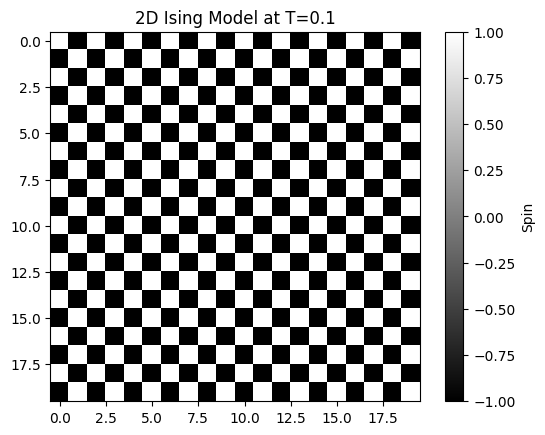

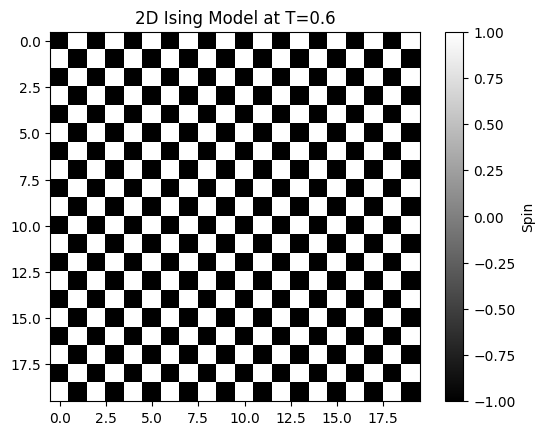

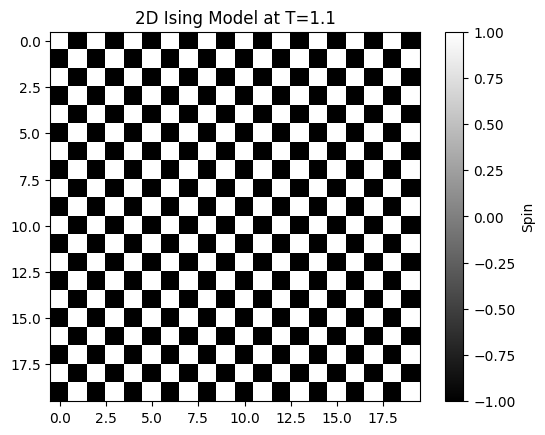

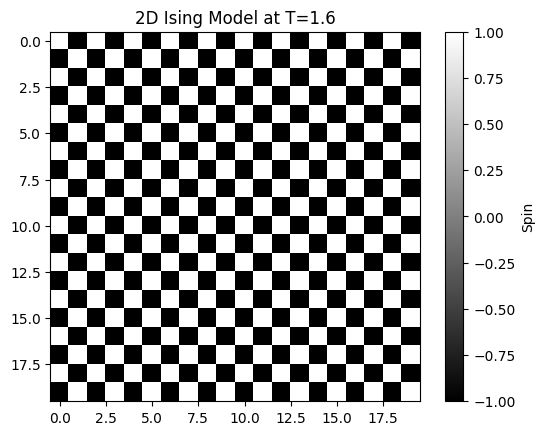

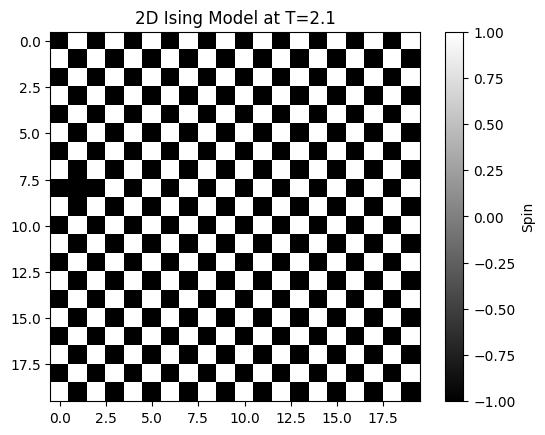

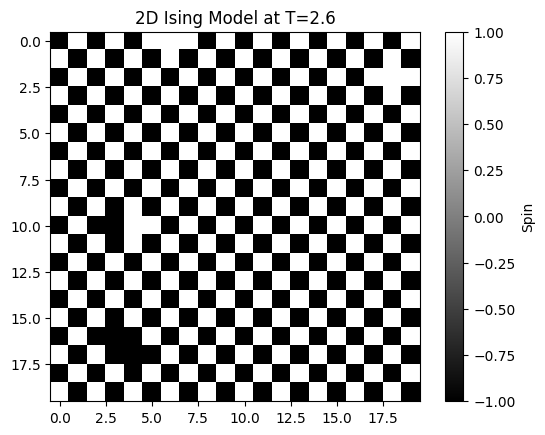

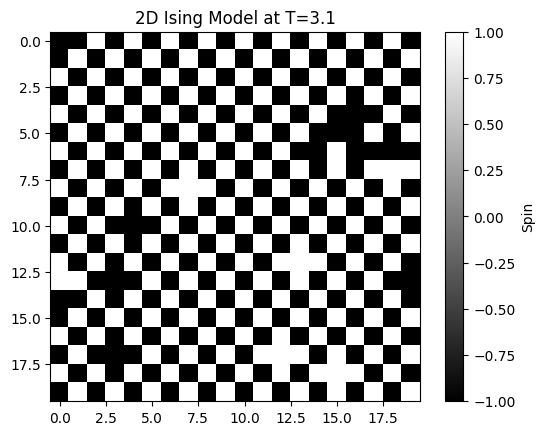

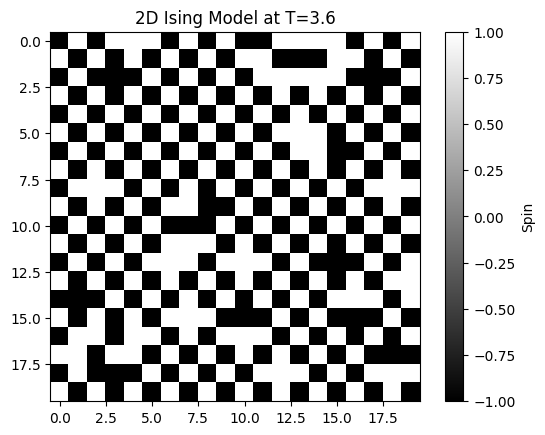

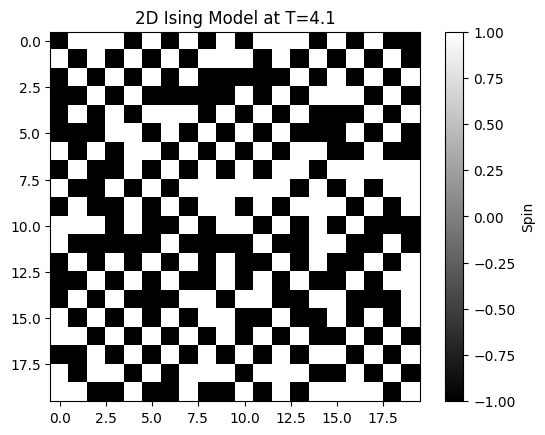

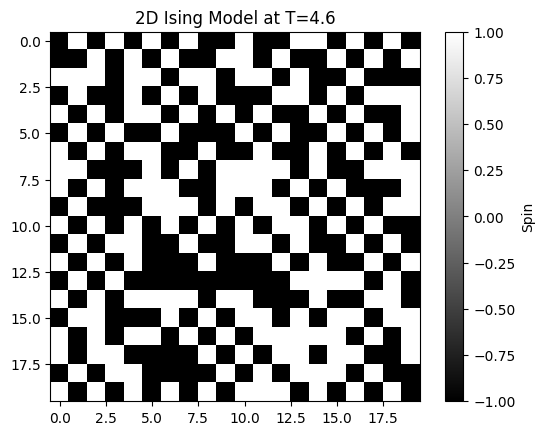

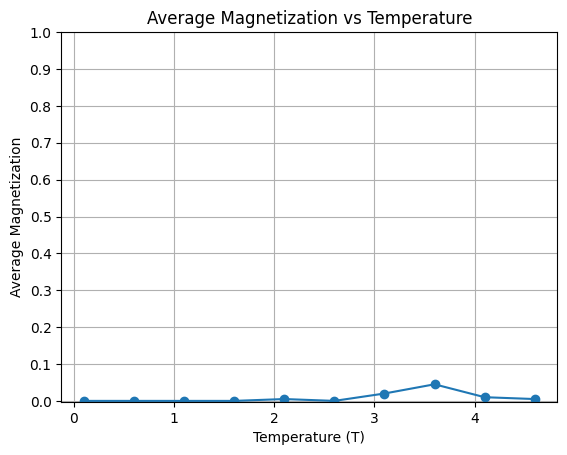

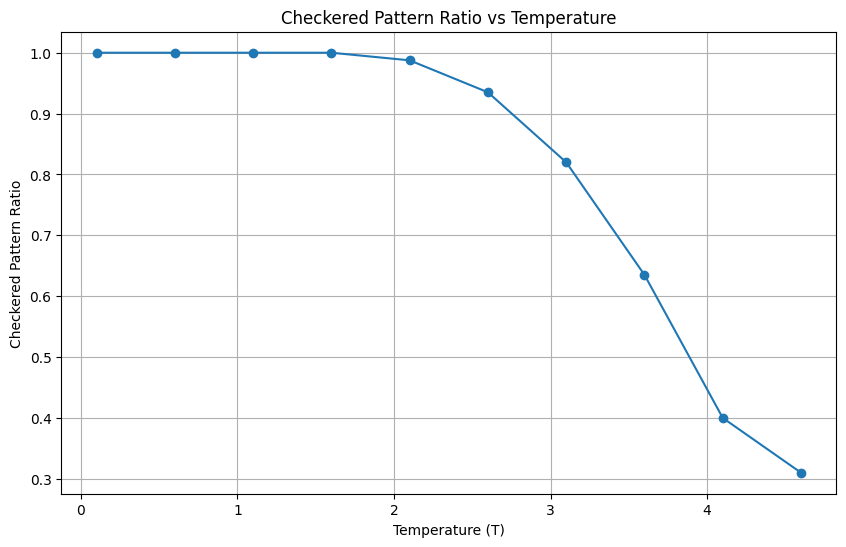

In [4]:

import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L):
    lattice = np.random.choice([-1, 1], size=(L, L))
    return lattice

def metropolis_step(lattice, J1,  J3, T):
    L = lattice.shape[0]
    for _ in range(L**2):
        x = np.random.randint(L)
        y = np.random.randint(L)

        neighbors = (lattice[(x+1)%L, y] + lattice[x, (y+1)%L] +
                     lattice[(x-1)%L, y] + lattice[x, (y-1)%L]  )

        J = J1

        delta_E = 2 * J * lattice[x, y] * neighbors + 2 * J3 * lattice[x, y] * (lattice[(x+1)%L, (y+1)%L] + lattice[(x-1)%L, (y-1)%L] + lattice[(x+1)%L, (y-1)%L] + lattice[(x-1)%L, (y+1)%L])

        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            lattice[x, y] *= -1

    return lattice

def simulate(L, J1 , J3, T, steps):
    lattice = initialize_lattice(L)
    for step in range(steps):
        lattice = metropolis_step(lattice, J1 , J3, T)
    return lattice

def calculate_magnetization(lattice):
    return np.mean(lattice)

def plot_lattice(lattice, T):
    plt.imshow(lattice, cmap='gray', interpolation='nearest')
    plt.colorbar(label='Spin')
    plt.title(f'2D Ising Model at T={T}')
    plt.show()


def calculate_checkered_ratio(lattice):
    L = lattice.shape[0]
    checkered_count = 0

    for x in range(L):
        for y in range(L):
            # 인접 스핀들과 비교하여 체크무늬 패턴 감지
            if (lattice[x, y] != lattice[(x+1)%L, y] and
                lattice[x, y] != lattice[x, (y+1)%L] and
                lattice[x, y] != lattice[(x-1)%L, y] and
                lattice[x, y] != lattice[x, (y-1)%L]):
                checkered_count += 1

    total_sites = L * L
    checkered_ratio = checkered_count / total_sites
    return checkered_ratio


# 시뮬레이션 설정
L = 20  # 격자 크기
J1 = -1.0
#J2 = -1.0
J3 = 0.5 # 대각선 상호작용에 대한 상수값
steps = 5000

# 시뮬레이션 실행
Ma_list = []
T_list = np.arange(0.1, 4.7, 0.5)
checkered_ratios=[]

for T in T_list:
    final_lattice = simulate(L, J1 , J3, T, steps)
    plot_lattice(final_lattice, T)
    checkered_ratio = calculate_checkered_ratio(final_lattice) #체크
    checkered_ratios.append(checkered_ratio) #체크
    magnetization = calculate_magnetization(final_lattice)
    Ma_list.append(abs(magnetization))


# 자화 평균값
plt.plot(T_list, Ma_list, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs Temperature')
yticks = np.arange(0, 1.1, 0.1)
plt.yticks(yticks)
plt.grid(True)
plt.show()

#체크무늬 패턴 비율 그래프
plt.figure(figsize=(10, 6))
plt.plot(T_list, checkered_ratios, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Checkered Pattern Ratio')
plt.title('Checkered Pattern Ratio vs Temperature')
plt.grid(True)
plt.show()